# Introduction
We will utilize the Tesla stock dataset to predict stock prices. This dataset consists of 1692 rows and 7 columns, namely: Date, Open, High, Low, Close, Volume, and Adj Close. It is crucial to note that the dataset exhibits high data quality, as there are no missing values or duplicated rows present. The columns have different data types, with some being of 'object' type, indicating strings or mixed data, while others are 'float' or 'int' types, representing decimal and integer values, respectively. With these insights into the Tesla dataset, we are equipped to proceed with our stock price prediction analysis.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor







In [2]:
#uploading the tesla data set
teslaDf=pd.read_csv("Tesla.csv - Tesla.csv.csv")
#view of the dataset 
teslaDf.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999


## First of Exploratory Data Analysis  (EDA)
#### Is to understand the Tesla dataset

In [3]:
# Determine the number of rows and columns
numRows, numCols = teslaDf.shape
print("The Tesla dataset contain", numRows,"rows and",numCols,"columns.")

The Tesla dataset contain 1692 rows and 7 columns.


In [4]:
#basic information about the dataset 
#it contain information about the columns name and the Dtype 
teslaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
#using describe to see the mean, median and mode and etc
teslaDf.describe().round(2)

,Open,High,Low,Close,Volume,Adj Close
count,1692.00,1692.00,1692.00,1692.00,1692.00,1692.00
mean,132.44,134.77,130.00,132.43,4270740.90,132.43
std,94.31,95.69,92.86,94.31,4295971.35,94.31
min,16.14,16.63,14.98,15.80,118500.00,15.80
25%,30.00,30.65,29.21,29.88,1194350.00,29.88
50%,156.33,162.37,153.15,158.16,3180700.00,158.16
75%,220.56,224.10,217.12,220.02,5662100.00,220.02
max,287.67,291.42,280.40,286.04,37163900.00,286.04


In [6]:
#the sum of the missing datai the dataset 
teslaDf.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
#checking for duplicated
teslaDf.duplicated().sum()

0

Now that I have a better understanding of the Tesla dataset, let me summarize its key characteristics:

The Tesla dataset contains 1692 rows and 7 columns. The columns in the dataset are as follows: Date, Open, High, Low, Close, Volume, and Adj Close.

Regarding the data quality, the dataset does not have any missing data, meaning there are no null or NaN values present. Additionally, there are no duplicated rows, ensuring the uniqueness of each entry.

The data types of the columns in the dataset vary. Some columns are of type 'object', which typically represents strings or mixed data types. Other columns are of type 'float', indicating the presence of decimal numbers, while some columns are of type 'int', representing integer values.

By considering these details, you now have a better understanding of the Tesla dataset and its characteristics.

In [8]:
#Correlation to see the relationship between the variables  
Correlation=teslaDf.corr()
Correlation

/var/folders/df/qwqyr0095qz1dy5vxm7f7z5w0000gn/T/ipykernel_8000/398074986.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation=teslaDf.corr()


,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999623,0.999605,0.999233,0.407515,0.999233
High,0.999623,1.000000,0.999521,0.999691,0.416466,0.999691
Low,0.999605,0.999521,1.000000,0.999656,0.397615,0.999656
Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000
Volume,0.407515,0.416466,0.397615,0.406907,1.000000,0.406907
Adj Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000


#### The provided correlation matrix represents the relationships between different variables in a dataset. The variables include Open, High, Low, Close, Volume, and Adj Close. The values in the matrix are correlation coefficients that measure the strength and direction of the linear relationship between pairs of variables. For example, variables like Open and High have a strong positive correlation, while Close and Adj Close have a perfect positive correlation. The correlation matrix helps identify how variables move together or influence each other.

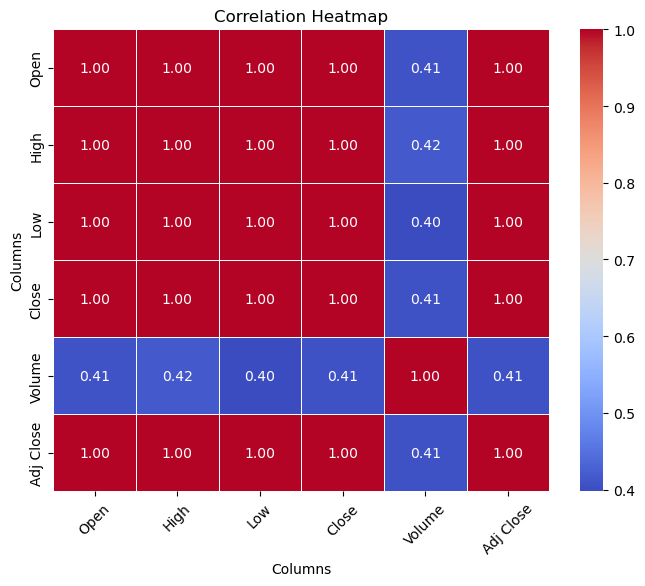

In [9]:
#Setting the figure size
plt.figure(figsize=(8, 6))
#Generate the heatmap with correlation matrix
sns.heatmap(Correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#Set the title and axis labels
plt.title("Correlation Heatmap")
plt.xlabel("Columns")
plt.ylabel("Columns")
# Rotate the x-axis labels if needed
plt.xticks(rotation=45)
plt.show()


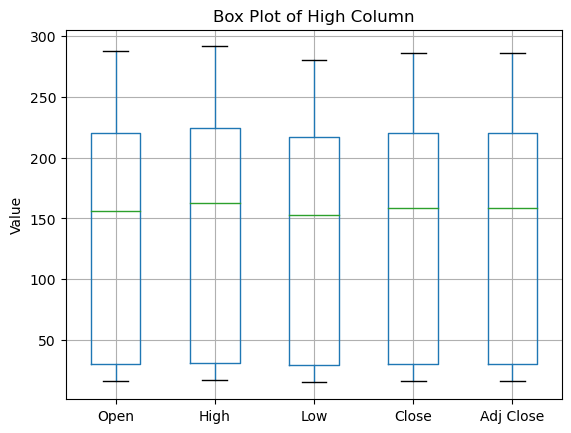

In [10]:
#doing boxplot to see the outliers 
teslaDf[['Open','High','Low','Close','Adj Close']].boxplot(showfliers=True)
# Display the plot
plt.title('Box Plot of High Column')
plt.ylabel('Value')
plt.show()

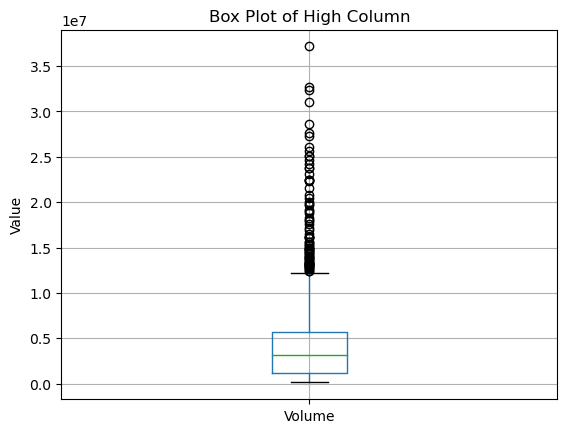

In [11]:
#as you see that volume is the only feature has outliers 
teslaDf[['Volume']].boxplot(showfliers=True)
# Display the plot
plt.title('Box Plot of High Column')
plt.ylabel('Value')
plt.show()

In [12]:
#Filter the DataFrame to keep only the rows where 'Volume' is within the range
df = teslaDf[teslaDf['Volume'].between(1194350, 5662100)]

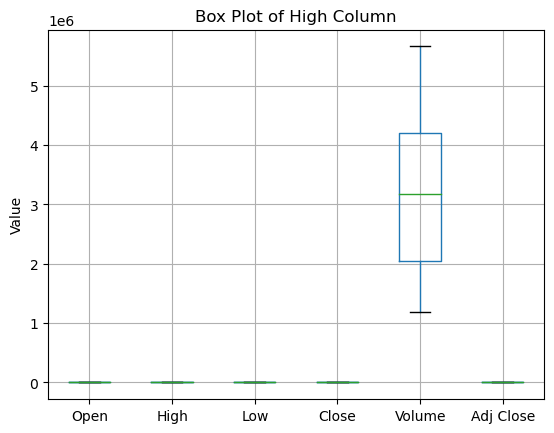

In [13]:
#check if the there still some outliers 
df.boxplot(showfliers=True)
# Display the plot
plt.title('Box Plot of High Column')
plt.ylabel('Value')
plt.show()

# Building Linear Regression

In [22]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LinearRegressionmodel = LinearRegression()
LinearRegressionmodel.fit(X_train, y_train)
y_pred = LinearRegressionmodel.predict(X_test)
LRmse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for is Linear Regression model", LRmse)

Mean Squared Error for is Linear Regression model 2.225421104326236


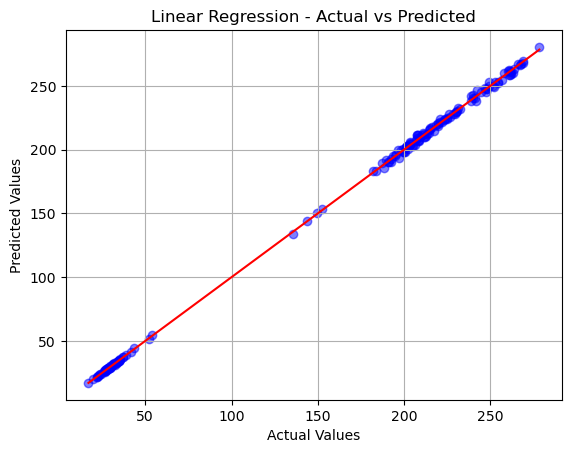

In [15]:
# Plotting the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Actual vs Predicted')
plt.grid(True)

# Plotting the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

plt.show()

#### The plot suggests a positive relationship between the predicted and actual values, indicating that there is a correlation between the features and the target variable. However, it does not guarantee a direct causal relationship, and predicting stock prices involves considering multiple factors beyond the regression model.

# Building Random Forest Regressor

Mean Squared Error for is Random Forest Regressor 4.438868386294813


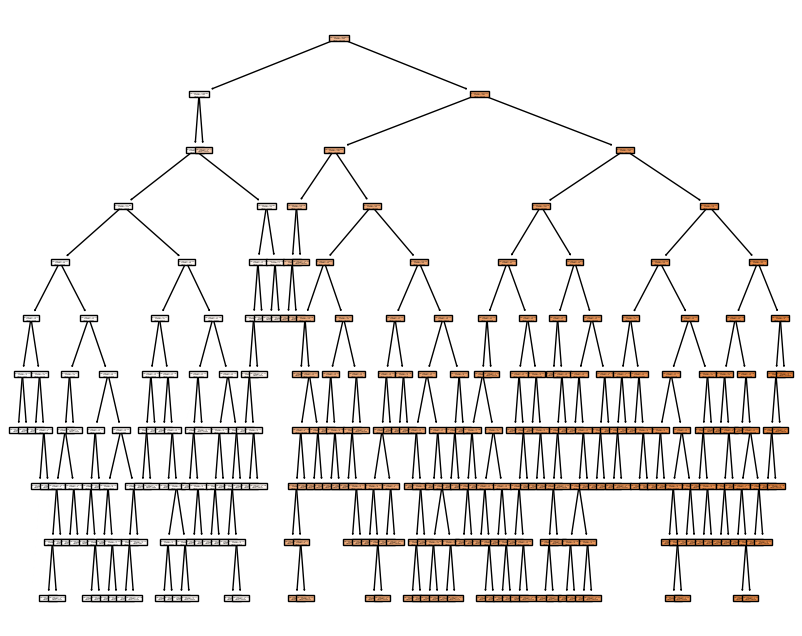

In [23]:
X = df[['Open', 'High', 'Low','Volume']]
y = df['Adj Close']

#creating  a random forest regressor with regularization
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
RFRmse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for is Random Forest Regressor", RFRmse)
from sklearn.tree import plot_tree

# Access the first decision tree in the random forest
tree = model.estimators_[0]

plt.figure(figsize=(10, 8))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

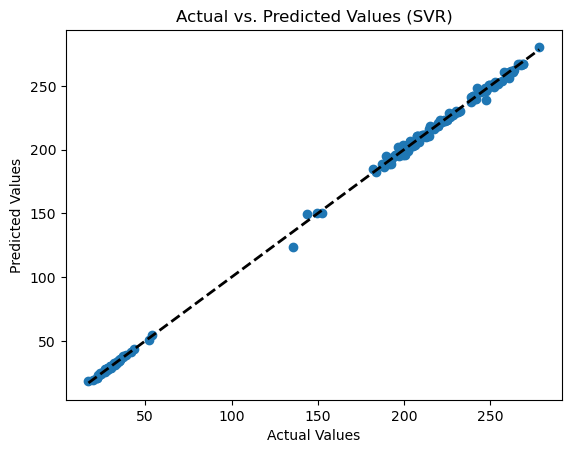

In [17]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (SVR)')
plt.show()

#### The decision tree shown above is still overfitting, despite attempts to address the issue. Overfitting occurs when the tree becomes too complex and captures noise or specific details of the training data that may not generalize well to new data. To mitigate overfitting, we can limit the tree's depth, increase the minimum samples required for splitting nodes, employ feature selection or dimensionality reduction, and use ensemble methods like random forests. While complete elimination of overfitting is challenging, applying these strategies and fine-tuning hyperparameters can help reduce overfitting and improve generalization.

# Building Support Vector Regression (SVR)

In [24]:
X = df[['Open', 'High', 'Low']]
y = df['Close']

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
SVRmodel = SVR()
SVRmodel.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = SVRmodel.predict(X_test_scaled)
y_pred 
# Evaluate the model
SVRmse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error for  is Support Vector Regression", SVRmse)

Mean Squared Error for  is Support Vector Regression 155.0747276793332


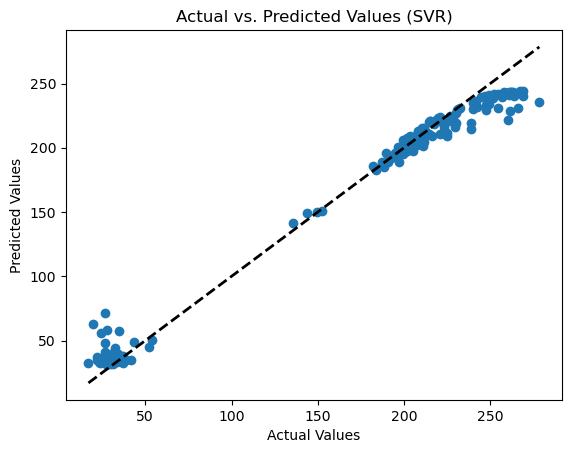

In [19]:
# Plot actual values vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (SVR)')
plt.show()


##### Since the graph of the SVR model shows that most of the predicted values are close to or halfway between the actual values and the diagonal line (black dashed line), it suggests that the model is performing moderately well in terms of predicting the target variable.Also, it suggests that the SVR model is making reasonable predictions. It means that the model is capturing some of the underlying patterns in the data, although there might be some degree of error or deviation in its predictions.

# Building Gradient Boosting Regressor

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error for Gradient Boosting Regressor is 4.425732853217389


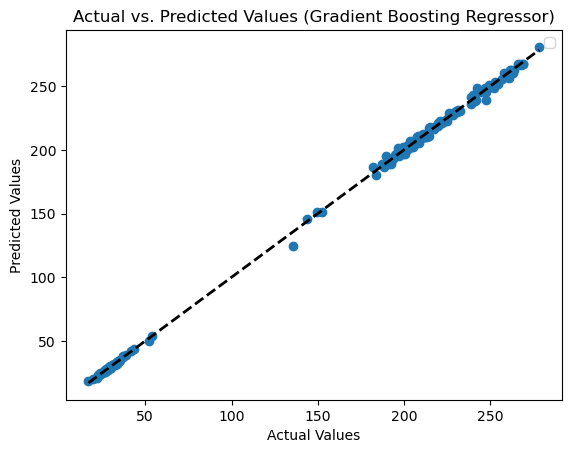

In [27]:
#Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()
#fit the model to the training data
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
gbrmse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Gradient Boosting Regressor is", gbrmse)

# Plot actual values vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.legend()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')
plt.show()


#### The Gradient Boosting Regressor closely align with the diagonal line, meaning that the model is performing well. It suggests accurate predictions and effective capturing of patterns in the data. This alignment reflects the model's ability to generalize and make reliable predictions.

In [26]:
#comparing MSE for each model
print("Mean Squared Error for is Linear Regression model", LRmse)
print("Mean Squared Error for is Random Forest Regressor", RFRmse)
print("Mean Squared Error for  is Support Vector Regression", SVRmse)
print("Mean Squared Error for Gradient Boosting Regressor is", gbrmse)

Mean Squared Error for is Linear Regression model 2.225421104326236
Mean Squared Error for is Random Forest Regressor 4.438868386294813
Mean Squared Error for  is Support Vector Regression 155.0747276793332
Mean Squared Error for Gradient Boosting Regressor is 4.230040475076607


##### Based on the MSE values, the Linear Regression model has the lowest MSE, indicating better performance in terms of minimizing the squared errors between the predicted and actual values. Therefore, the Linear Regression model is considered the best model among the ones you have evaluated.

# OLS Regression Results

In [32]:
df = df.dropna()

In [33]:
x = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.982e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        19:31:46   Log-Likelihood:                -1500.9
No. Observations:                 846   AIC:                             3012.
Df Residuals:                     841   BIC:                             3035.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0113      0.135      0.084      0.9

##### Overall, the regression model appears to have a perfect fit and all the predictor variables (Open, High, Low, Volume) are statistically significant in explaining the variation in the Adj Close variable. However, it's worth noting that the model has a large condition number, which suggests the presence of strong multicollinearity or other numerical problems. This indicates that there might be issues with the model's stability or the interdependence between the predictor variables. Further analysis and diagnostics may be needed to address these concerns.